# Lesson on Part of Speech Tagging

## Prerequisites 


### Prior Knowledge

This lesson is aimed at students without any prior experience with text analysis of data sets.  You will benefit from knowing how to start a terminal window on your computer, how to run commands on it and how to do basic coding in the programming language Python, but we will go over each step required in the lesson for anyone with no previous knowledge of these things.

### Remote Teaching

This lesson was originally written to teach in a lab with direct feedback to students. We will try our best to teach this remotely given the current situation with covid-19. It's set up to run on the University of Edinburgh's Noteable service which means that it can be done on a browser and should work on different operating systems (Windows, Linux or Mac).

We will take it slowly.  If any of the code does not work in your own browser on Noteable, we will do our best to help fix things for you on the call.  If you end up getting stuck, please don't despair ... the goal is to understand the principles and if you can get things running yourself then that's a bonus. If not, we provide all the tagged output files for the collection you will need for further analysis at the end.  This tutorial will remain available, you can return to it and try it again later.

## 1. Introduction

Welcome to a hands-on exercise on part-of-speech tagging a dataset. Here we will run through some of the basics that you will need when exploring and analysing text.

To start with, here is a bit of basic terminology that will be used in this lesson:

__Token:__ a single word, letter, number or punctuation mark

__String:__ a group of characters comprised of words, letters, numbers, and/or punctuation

__Integer:__ a positive or negative whole number with no decimal point

__Float:__ a positive or negative number with a decimal point

__Stop words:__ generally the most common words in a language (e.g. "the", "of", "and" etc.) which are sometimes filtered out for text analysis purposes in order to focus on the other vocabulary in the text.

__Part of speech (POS) tag:__ The POS-tag of a word is a label attached to the word indicating its part of speech as well as grammatical categories such as tense, number (plural/singular) and case.  For exmample, the POS-tag for "sun" is "NN" (noun).

__POS tagging:__ POS-tagging is the process of automatically assigning the POS-tags to tokens in a corpus.

__Document:__ a single file containing some text

__Corpus:__ a collection of documents

## 2. Introduction to Noteable and Jupyter Notebooks

This lesson is run using [Notable](https://noteable.edina.ac.uk), the University of Edinburgh's [Jupyter Notebook](https://jupyter.org) server. Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualisations and narrative text.  You interact with it via a browser window rather than using a separate stand-alone app.  Notable makes Jupyter Notebook operating-system-independent which means that there are no prior setup instructions for different operating systems.

### 2.1 Starting Noteable
To start the lesson within a Jupyter Notebook, you first need to start the Noteable service in Learn (click on the link provided in the course). This will open a new tab in your browser and you have to click "Start".

This will open up a browser window or tab containing the base directory of where you can store your new notebooks on your computer.  It may take a couple of seconds for the browser window to open.

### 2.2 Creating a new notebook

To create a new notebook you need to select a location for it on your computer via the browser window that opened up and click on "New" in the top right corner of the browser.  You also need to select Python 3 to do so.

![Starting a new notebook](./fig/start-notebook-noteable.png)

Once the new notebook opens you can give it a name by changing the word "Untitled" in the first line of the new notebook that opens up. Give your notebook a name like ‘POS-tagging in Python’.

![A new notebook](./fig/new-notebook-noteable.png)

You can see the first cell in your new notebook starting with "In \[ \]".  You can enter Python code into this cell and press ">|Run" as long as it is marked as "Code" in the menu at the top of your notebook.  This will run your code and you will see any output created by the code immediately below it. If you simply press Enter, this won’t run the code. Instead, use the keyboard shortcut for Run which is Shift-Enter. (To run the  cell you are currently on and insert a new cell below, use Option-Enter on a Mac, and Alt-Enter on a Windows computer.)

Notebooks are really useful because they allow you to have your notes and your code in one place:

- Notes (or Markdown) cells: like what you are reading now, are cells of written text that explain concepts
- Code cells: like the `2+3` below are parts of python programming code, that you can RUN (we will show you how). This means that the code (like `2+3`) will be interpreted by the Python (`oh, I think they are asking me to add two numbers, 2 and 3`) and executed `that's 5, here you go`. When the code is being run, python will kindly return you the result, and we will learn later how to show it (print it) in a bit nicer ways.

In [1]:
2 + 3 

# above is your first piece of Python code and this line is a comment. 
# Comments are notes you can leave inside of your code, 
# they start with a # and are ignored by the Python

# To 'RUN' this cell, select this cell and click '>| Run' above 
# (or if you're into keyboard shortcuts use Shift+Enter )

5

When the code above is **interpreted** (or **run**) you should see the result below the cell you have ran.

Do you see it? Spoiler alert, it should be 5, because if you interpret `2+3` operation, it will result in a number `5`. 

Notice that when you run a cell, the next cell is automatically highlighted.  Also when you press run on a bit of code in your notebook, you will know that the processing is finished when the asterix in square brackets ```[*]``` to the left of the window changes to a number. The number tells you the order in which Python has run the cells, so if you run cells out of order (and get unexpected errors), looking at the numbering allows you to check that you are running cells in the right order.

Run below cells and see what happens (basically click "Run" a few times, or press Shift+Enter a few times).

What do you expect to see?

In [2]:
# numbers need no quotes around them. Python will use maths to add them
20+30

50

In [3]:
# but words have quotes, and python will use grammar to add them
"hello" + "my" + "friend"

'hellomyfriend'

In [4]:
# oh no, the one above is too close together. We could try to add spaces, but it starts looking complicated
"hello" + " " + "my"  + " " + "friend"

'hello my friend'

You can change the text in the cell a notebook and re-run the cell as many times as you like, to see the difference.

This should be all you need for using a notebook in this lesson but more information on how to use Jupyter Notebook and how to store a notebook can be found in this Data Carpentries lesson [Overview of Jupyter Notebook](https://datacarpentry.org/python-ecology-lesson/jupyter_notebooks/).

## 3. Introduction to Python

Python is a programming language. We will use it as a way to interact with and analyse text documents. We can use Python either through the command line in your terminal window, by writing Python scripts or via a notebook (as in this lesson).

This introduction to Python is important for understanding all the steps that follow.  If you are new to programming it may not be entirely clear why you need to learn Python first. Bear with us, you will soon understand why it is needed and useful and it will help to speed things up later-on.

We will limit this introduction to the level of Python required for this lesson. For a more in-depth introduction to Python, we recommend the following [Library Carpentries lesson](https://librarycarpentry.org/lc-python-intro/).

### 3.1 Printing text on screen

So far we were sort of cheating by "returning" the result of our code. Returning happens when python reaches the end of a cell and isn't told what to do, so it just panics and returns the most recent things it thinks about. Returning is not the kinderst way to show something on the screen. A nicer way is to kindly ask python to "print" things.

`print()` is a python's function/method that prints (shows/displays) something on the screen. 

Functions (also called methods) are sort of like skills that python creators created for you. You can use them to achieve what you're after. We will learn a few of them in a minute.

Like every function print() has a:

- **name** usually describing the action we'll do eg. `print`
- **arguments** in brackets, the things we want use for that action e.g. `("Hello")` or `("Hello","my","friend")`

We first want to test that Python works by asking it to print a string, so type ```print("Hello World")``` into the next cell as shown below and run it as code.  Then try it out yourself with other text.

In [5]:
print("Hello World")

Hello World


In [6]:
print("I can print!")
print("All the things")

I can print!
All the things


### 🐛 Task

In [7]:
# Try out printing something below here by typing in this cell and running it


You know how you teach a dog to `fetch`. It would not make much sense to tell a dog to fetch, but not tell it what it needs to use that skill on. That's why you would normally show the dog a ball or a stick, and then shout `fetch` as you throw it. In progamming terms you would do something like `dog.fetch("stick")` or `dog.fetch("ball")`. This will all start looking familiar soon.

Did you notice that it get printed underneath the cell, but without the ugly **Out[123]:** on the left, like it did in the previous examples?  That's because we printed the text, not just 'returned the result'. Printing is a nicer and often more readable way to get python to show something.

Also notice that you can give many arguments to the `print()` function. What will happen is they will get separated by spaces, so they look better.

In [8]:
print("Hello","my","friend")

Hello my friend


### 🐛 Task

Add some code in this cell (below this comment) and then RUN this cell
- that will print your full name, 
- and another line that will print your favourite pizza toppings.

Do you see your words displayed on the screen? Yay! You are a python programmer now.

<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    print("Beatrice Alex")
    print("artichoke")
    ### END SOLUTION
</details>

### 3.2 Variables and how to use them

So far each line of code has been a world of its own. Once it's 'Run', it forgets everything. It might have printed something or returned something but nothing is **stored for later**.

Unless we use a digital way to store things, called a VARIABLE. Which is like a locker in which you can store things, and just as a locker has its number and its contents, each variable has a: 

- **name** like a label on the locker, so we can find it later, and some
- **content** something we put inside it to use later

For example we can put the string “text mining” into the locker named “superpower”, as follows:

In [9]:
superpower = "Text Mining"
# run this cell now, but do not worry if you do not see anything returned or printed!

This part will be a bit confusing to some of you: the sumbol **=** means something else in programming than what it means in maths (where it means 'equals').

The equals symbol **=** in Python is called an 'assignment operator' because it assigns what's on the right of it to what's on the left. It works a bit like a left-pointing arrow **<---**  To extend the variable-as-locker analogy, it is more like the word ‘contains’.

You can imagine

`superpower = "Text Mining"`

as:

`superpower <--- "Text Mining"`

It will take the text value on the right hand side (`"Text Mining"`) and store it for later (assign it) to a variable on the left hand side (`superpower`). Notice variable names have no quotes around them.

so this code

`contents_of_my_locker = "shoes"`

is a bit like 

`contents_of_my_locker <--- "shoes"`

and puts the word `"shoes"` into the variable `contents_of_my_locker`.

You can see the content of the variable (i.e. what's in the box) by printing the value of it using the ```print()``` function and the variable name as shown:

In [10]:
# When that when you've run the above cell it did NOT return or print anything.
# But it did something even more useful: 
# it remembered the words "Text Mining" forever in a variable called superpower.
# So now you can use that variable in other cells below:

print(superpower)
print("My new superpower is "+superpower)

Text Mining
My new superpower is Text Mining


Notice the difference between using "superpower" as a word, and superpower as a variable name. Python does not like guessing what we mean, so we need to explicitely specify if we mean something as a name of a variable or text. In Python, the colour highlighting can often help you identify what is interpreted as what.

We could have chosen something other than ‘superpower’ when choosing the variable name – ‘term’, or ‘celery’ or ‘tjdiasdfuah’. You can give a variable any name (mostly) and Python will understand that.  While you can chose any variable name, it is good practice to name the variable after what it represents.  In this case ```superpower``` is actually not the best description of the string it contains.  Instead we could call it ```skill```.  The reason for choosing meaningful names is to  make it easier to read and understand the code.

You can create as many variables as you want, as long as their names are unique, and do not contain spaces. Also Python likes to use underscores (_) for multi-word variable names.

In [11]:
student_name = "Nicola Minestrone"
course_title = "Text Mining"
print(student_name, "is taking", course_title, "course")

Nicola Minestrone is taking Text Mining course


### 🐛 Task

Try to explain in your own words what's happening in the code below, then change the name of the variable into `surname` and put your own surname there. You might see some errors, but do not threat.

In [12]:
friend = "Natalie"

print("hello " + "friend")
print("hello " + friend)

hello friend
hello Natalie


### 3.3 Types of variables: String, Integer, Float

While in this lesson we will be concentrating mainly on strings, variables can hold different 'types' of things:

In [13]:
superpower = "Text Mining"  # String: holds text, has quotes "" or ''
number = 42  # Integer: holds whole numbers, no quotes
pi_value = 3.1415  # Float: numbers with decimal places, in some context you might also see 'double'
print(superpower, number, pi_value)

Text Mining 42 3.1415


In [14]:
# can you guess what will be printed before you run this cell?

print(123 + 123)
print("123" + "123")

246
123123


This happened because when we add two words, Python glues them together in order, but when we add two numbers then it uses maths.

But what when the below scenario happens:

In [15]:
print("The meaning of life is " + 42)

# BRACE BRACE! this code is not correct and will freak out,
# but don't worry. Run this cell and see what happens!

TypeError: can only concatenate str (not "int") to str

Errors are your best friends and they really do their best to explain:

- where something went wrong (green arrow) `---->`
- what is wrong & how you can fix it. (last line) `TypeError: can only concatenate str (not "int") to str`

### 🐛 Task

Can you fix the above line of code so that it prints "The meaning of life is 42" and run it again? There are a few ways to achieve that. Try to use the fact it knows how to add two strings - how do you make something a string?

<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    print("The meaning of life is 42")
    print("The meaning of life is " + "42")
    ### END SOLUTION
</details>

### 3.4 Lists (Collections of things)

We have just looked at variables and how they can contain a single thing (a string of words, a whole number, a number with a decimal point). Variable can also contain more than one thing, for example a list.

Lists are used to group data together in an ordered way. Lists are very common data structures used in Python, for example to represent text.

You can represent the quote from George Orwell (1984) as one long string:

`sentence = "It was a bright cold day in April, and the clocks were striking thirteen."`

but you can also store it as a list of its tokens (words and punctuation):

`tokens = ["It","was","a","bright","cold","day","in","April",",","and","the","clocks","were","striking","thirteen","."]`

Lists are created by typing comma separated values inside square brackets. eg. `["one","two","three"]` or `[4,5,6]`

You can print out all elements in the list at once using `print(your_variable)`.

In [16]:
tokens = ["It","was","a","bright","cold","day","in","April",",","and","the","clocks","were","striking","thirteen","."]
print(tokens) # print all elements

['It', 'was', 'a', 'bright', 'cold', 'day', 'in', 'April', ',', 'and', 'the', 'clocks', 'were', 'striking', 'thirteen', '.']


It is very important to get your quotes correct when working with strings (text) and lists (collections).

The colours in your code editor will help you.

### 🐛 Task

The code below is not correct. There are at least three things wrong in there. Can you fix it?

Try running the cell, and reading the error. Errors are your friends.

Run the cell, read the error and ONLY FIX WHAT THE ERROR TELLS YOU TO FIX, one step at a time. Then run the cell again, see the new error and fix only that. It's a very good practice and you will learn a lot!

Hint: single quotes and double quotes are interchangable, you can use 'hello' and "hello"

In [17]:
# Run this cell, and only fix what the error tells you. Resist the urge to fix other mistakes.
# notice a little mini-arrow pointing up  ^  to the exact point something is wrong.

reaction = ["It"s", "my" "absolutely", favourite, "song", !]
print(reaction

SyntaxError: invalid syntax (<ipython-input-17-76fc4eb5174b>, line 4)

<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    reaction = ["It's", "my", "absolutely", "favourite", "song", "!"]
    print(reaction)
    ### END SOLUTION
</details>

A list holds an **ordered** sequence of elements (in this case words or punctuation) and each element can be accessed using its index (or position in the list).

It means that if you want to get the n'th item in a list (where n is it's index), you need to say something like `list_name[n]`. 

For example: `tokens[3]` - using the name of the list eg. `tokens`, and the desired index in square brackets eg. `[3]` will return the item in tokens list, stored at index (place) 3. 

In [18]:
# for example to print first item in the below list  
tokens = ["It","was","a","bright","cold","day","in","April",",","and","the","clocks","were","striking","thirteen","."]

# you would use
print(tokens[1]) # print the first element

was


Wait WHAT? That should have printed `'It'`

Note: Python indexes start with 0 instead of 1. So the first element in the list has index 0, and is accessed with `tokens[0]` and the `tokens[1]` actually returns the second item in the list (which is `'was'`).

### 🐛 Task

Fix the below code to print the first (not the second) item in the list.
How would you access the third one, or the last one? Add lines of code that do that.
And how about accessing an item at an index that does not exist? like 100, or -1 ? Try it.

In [19]:
print(tokens[1])

was


<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    print(tokens[1])
    print(tokens[0])
    print(tokens[2])
    print(tokens[15])
    ### END SOLUTION
</details>

You can also print a slice of the list (e.g. the first two elements of the list):

You can also get a slice (a section) of the list by specifying the start and end of your slice. (note that the end is non-inclusive)

The syntax is `some_list_variable[ beginning_index : end_index ]` so to get second half of our `tokens` list we could use: `tokens[4:9]`. It will be a slice which starts with the item at index 4 (`'cold'`) and ends after at index 8 (`','`).

In [20]:
print(tokens[4:9])

['cold', 'day', 'in', 'April', ',']


In [21]:
# e.g. the first two elements of the list:
print(tokens[0:2])

# e.g. from third (at index 2) till sixth (at index 5) of the list:
print(tokens[2:6])

['It', 'was']
['a', 'bright', 'cold', 'day']


It takes a bit of time to get used to counting from 0 and that the end index of a slice is not included. eg. `tokens[0:2]` is not ` ['It', 'was', 'a']` but ` ['It', 'was']` because the item at end_index (`2`) is not included.

### 🐛 Task

Write code below that will:

- print the first 5 items of the tokens list,
- print the last 5 items,
- print all items apart from the first and last one,
- print just `['cold','day']`

<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    tokens = ["It","was","a","bright","cold","day","in","April",",","and","the","clocks","were","striking","thirteen","."]
    print(tokens[0:5])
    print(tokens[11:])
    print(tokens[1:15])
    print(tokens[4:6])
    ### END SOLUTION
</details>

In [22]:
tokens = ["It","was","a","bright","cold","day","in","April",",","and","the","clocks","were","striking","thirteen","."]
# write your answers here:

#### Additional ways to address indexes: default value and counting from the end

In [23]:
# if you skip the number before or after the : it will assume 'all the way till the beginning/end'
# so these two lines do the same thing, but the second one uses the 'default value' of 'from the begining'
print(tokens[0:3])
print(tokens[:3]) 

['It', 'was', 'a']
['It', 'was', 'a']


In [24]:
# and here the second one uses the 'default value' of 'till the end' 
print(tokens[3:16])
print(tokens[3:])

['bright', 'cold', 'day', 'in', 'April', ',', 'and', 'the', 'clocks', 'were', 'striking', 'thirteen', '.']
['bright', 'cold', 'day', 'in', 'April', ',', 'and', 'the', 'clocks', 'were', 'striking', 'thirteen', '.']


In [25]:
# you can use minus to count from the end using negative numbers
# eg. the second line to get the last 3 items, start with "third from the end" and goes to the end
print(tokens[13:])
print(tokens[-3:])

['striking', 'thirteen', '.']
['striking', 'thirteen', '.']


In [26]:
# to get all the words apart from the last two, we can use negative values as the end index
print(tokens[:7])
print(tokens[:-9])

['It', 'was', 'a', 'bright', 'cold', 'day', 'in']
['It', 'was', 'a', 'bright', 'cold', 'day', 'in']


Finally you might want to check how long a list is. For that you can pass the list into Python's length function len( something) where something is the collection you want to measure.

In [27]:
print(len(tokens))

16


Note you can also use the len() function for a string to determine how long it is in characters.

In [28]:
print(len(tokens[0]))

2


### 3.5 A "for" loop

It's best if we start by seeing a loop with our own eyes

In [29]:
# this will loop through each word in the list, and print it with a "I say:" before it

tokens = ["It","was","a","bright","cold","day","in","April",",","and","the","clocks","were","striking","thirteen","."]
for word in tokens:
    print("I say:", word) #this will happen 16 times. Once for each item in a list

I say: It
I say: was
I say: a
I say: bright
I say: cold
I say: day
I say: in
I say: April
I say: ,
I say: and
I say: the
I say: clocks
I say: were
I say: striking
I say: thirteen
I say: .


The syntax of a for loop starts with `for one_thing in many_things:` where:

- `many_things` is the collection you want to go through (in our case a List of tokens.)
- `one_thing` is a temporary variable name that will represent the exact element of `many_things` that we are dealing with.

The code has run 16 times: first time `word` was equal to `"It"`, second time it was equal to `"was"` and so on.

So when we are looping (going through) the list, the temporary variable keeps changing value until we run out of things to loop through.

The indented pieces of code after the `:`  specify what needs to be done with `one_thing`. The indenting is a tab (or four spaces) so that Python knows the instructions that follow need to be executed each time.

When the indentation ends, python will know to stop looping.

You can specify the collection to loop through 'by hand' - it does not need to be a variable

In [30]:
for day in ['Monday', 'Tuesday', 'Wednesday']:
    print("the day is", day)   

the day is Monday
the day is Tuesday
the day is Wednesday


### 🐛 Task

- Can you print each item in tokens but surrounded by * like `*It*`?
- (tricky) Can you print only the first 5 elements of the sentence, one on each line? (remember the slice syntax above `your_list[ start : end]`)

<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    tokens = ["It","was","a","bright","cold","day","in","April",",","and","the","clocks","were","striking","thirteen","."]
    for token in tokens:
        print ("*" + token + "*")
    
    print(tokens[0:5])
    ### END SOLUTION
</details>

### 3.6 List comprehension (another useful way to loop)

You can use this simplified loop syntax when want to take a list of items and change each item into something else. Think about it like a conveyor belt: things go in on one side, and slightly changed things come out on the other side.

The syntax for this is:

`result = [ my_output for one_item in all_items]`

Example: for each token in tokens, represent it as a lowercase version of that token `word.lower()`, eg change `It` into `it`, `April` into `april` etc.  The result is a list of lower-cased tokens.

In [31]:
# note: token.lower() turns that token into a lowercase (if it isn't already)

tokens = ["It","was","a","bright","cold","day","in","April",",","and","the","clocks","were","striking","thirteen","."]
lower_case_tokens = [ token.lower() 
                      for token in tokens ]

print(lower_case_tokens)

['it', 'was', 'a', 'bright', 'cold', 'day', 'in', 'april', ',', 'and', 'the', 'clocks', 'were', 'striking', 'thirteen', '.']


### 3.7 A tuple

A tuple is similar to a list as it is an ordered sequence of elements. The difference is that tuples, unlike variables, can't be changed once created (you can only overwrite them but not increase or decrease them).

You can recognise tuples by their `( )` brackets. Like in lists, you separate items with a coma, like in `('blue', 'green', 'red')`

In [32]:
haircolour_tuple = ('hair', 'blond')
eyecolour_tuple = ('eyes', 'blue')
print("Hair colour: " + str(haircolour_tuple[1])) # prints the 2nd entry in the tuple
print("Eye colour: " + eyecolour_tuple[1])

Hair colour: blond
Eye colour: blue


### 🦋 Final Task (before we get our hands dirty)

Putting it all together, re-load the quote as a list of tokens, loop through the list and, for each token, print out the token and its character length.

<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    tokens = ["It","was","a","bright","cold","day","in","April",",","and","the","clocks","were","striking","thirteen","."]

    for token in tokens:
    print(token, len(token))
    ### END SOLUTION
</details>

## 4. Importing Packages

Python has a selection of pre-written code that can be used. These come as in built functions and a library of packages of modules. We have already used the in-built function ```print()```.  In-built functions are available as soon as you start Python. There is also a (software) library of modules that contain other functions, but these modules need to be imported. 

For this course we need to import a few libraries into Python. To do this we need to use the ```import``` command. 

NLTK is the tool which we'll be using to do much of the text processing in this workshop so we need to run ```import nltk```.

In [33]:
import nltk

## 5. Data Preparation

Text data comes in different forms.  You might want to analyse a document in one file or an entire collection of documents (a corpus) stored in multiple files.  In this part of the lesson we will show you how to load a single document and how to load the text of an entire corpus into Python for further analysis.

### 5.1 Download some data

Firstly, you need to download a dataset and store it with your notebook.  We need the path to the data dataset online in order to download and read it for further processing.

We will use the [Medical History of British India](https://data.nls.uk/data/digitised-collections/a-medical-history-of-british-india/) collection provided by the [National Library of Scotland](https://www.nls.uk) as an example:

<img src="./fig/mhbi.png" width="700">

> This dataset forms the first half of the Medical History of British India collection, which itself is part of the broader India Papers collection held by the Library. A Medical History of British India consists of official publications varying from short reports to multi-volume histories related to disease, public health and medical research between circa 1850 to 1950. These are historical sources for a period which witnessed the transition from a humoral to a biochemical tradition, which was based on laboratorial science and document the important breakthroughs in bacteriology, parasitology and the developments of vaccines in a colonial context.

This collection has been made available as part of NLS's DataFoundry platform which provides access to a number of their digitised collections.

We are only interested in the text the Medical History of British India collection for this course so at the bottom of the website.  You can download it directory onto your computer from NLS's website but HOLD OFF. We will show you how to download it for direct use with your notebook.

We are only interested in the text of this collection (not the images).  You can download it by running the next cell.

To open and read a file from the internet, we use `urllib.request.urlopen()` and `.read()`. Once the file is opened, you can store it's contents in a variable (`zipFile`) and save it to a specified location.

In [36]:
# we store url of dataset as a variable
URL = 'https://nlsfoundry.s3.amazonaws.com/text/nls-text-indiaPapers.zip'

# these imports are needed for downloading and unzipping the data
import zipfile
import urllib

# open and save the zip file into your noteable folder
url = urllib.request.urlopen(URL)
zipFile = open('./data/nls-text-indiaPapers.zip', 'wb')    # note the flag:  "wb" ... it stands for "write and binary"       
zipFile.write(url.read())
zipFile.close()

# uncompress the zip file so that you can access each individual text file in the collection
directory_to_extract_to = "./data"
with zipfile.ZipFile('./data/nls-text-indiaPapers.zip', 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

This previous cell specifies the ```URL``` of where the data is stored online.  In this case it's a zip file on NLS's server.  The code then opens the URL, downloads the zip file by writing it to your Noteable directory and uncompresses it for you.  Once you have run this cell you should find a folder called ```nls-text-indiaPapers``` inside the ```data``` directory that is provided with this lesson on Noteable.  Please check that you have that now. You should see a folder called ```nls-text-indiaPapers``` inside the ```data``` directory in Noteable containing all the ```.txt``` files for this collection.  Please check that you have that now.

This last bit of code is quite complicated for Python novices.  Don't worry too much about it.  All it does is download and save the data we need to the right place.  We could have provided the data for you to make this easier but if you ever wanted to use your own data to do any analysis on it then now you know how to do that.

### 5.2 Loading and tokenising a single document

You can use the ```open()``` function to open a local file in the Medical History of British India corpus. You need to specify the path to a file in the downloaded dataset and the mode of opening it (the 'r' after the filename stands for ‘read’, i.e. it tells Python that the file is readeable).

The ```read()``` function is used to read the file into memory. The file's content (the text) is then stored as a string variable called ```mhbi74457530_raw```.  When reading a local file you also need to close it once you're done (using the ```close()``` function).  This is to make sure that its ready for someone else to use it.

In [37]:
file = open('./data/nls-text-indiaPapers/74457530.txt','r')  
mhbi74457530_raw = file.read()
file.close()
print(mhbi74457530_raw)

No. 1111 (Sanitary), dated Ootacamund, the 6th October 1876. From-The Honourable W. HUDLESTON, Chief Secretary to the Govern- ment of Madras. To-The Offg. Secretary to the Government of India. Resolution of Government of India No. 1-137, dated 5th March 1875. Letter from Government of India No. 486, dated 5th September 1876. Letter to Government of India No. 1063, dated 26th ditto. REFERRING to the papers marginally noted,  I am directed to forward copies of the annual re- port of the Sanitary Commis- sioner, Madras, for 1875, and to state that Appendix I. contains the information called for regard- ing distribution and causation of leprosy. N. C. D.-Home, Rev. & Agri. Dept. Press-No. 461-26-8-79-100.
No. 388, dated Bombay Castle, the 6th February 1878. From-The Honourable E. W. RAVENSCROFT, C. S. I., Chief Secretary to the Government of Bombay. To-The Offg. Secretary to the Government of India, Home Department. REFERRING to paragraph 8 of the Government of India's Resolu- tion No. 1-1

What if it's just one online file?

We can write Python to open the following remote (online) file: http://www.gutenberg.org/files/1513/1513-0.txt

In this case, you are opening a .txt file so you do not need to store and unzip it first.  You can read a remote file directly from its online location using ```.read().decode('utf-8')```.

In [39]:
URL = "http://www.gutenberg.org/files/1513/1513-0.txt"
my_file = urllib.request.urlopen(URL)
text = my_file.read().decode('utf-8')

Note that this file is never saved on your computer as a file.  It is opened, read, its content saved to a variable and closed.  Now you can do things with the text stored in the ```text``` variable.

### 🐛 Task

Can you display the characters between the indeses 42380 and 42869 in that file?

<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    print(text[42380:42869])
    ### END SOLUTION
</details>

Let's come back to the medical history data and the previous file we opened (```74457530.txt```) and let's tokenise its text.  To do that you first need to import some packages from NLTK to be able to do the tokenisation and download a tokeniser provided with NLTK called ```punct```.  The tokeriser works by splitting the text into tokens using whitespace and punctuation. 

In [40]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/balex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

To tokenise a text (in our case a long string) you can call the ```word_tokenize()``` function provided by NLTK.  It needs the input string specified in the brackets and the tokenised output (the tokens) can be stored in a list (```mhbi74457530_tokens```)

In [41]:
mhbi74457530_tokens = word_tokenize(mhbi74457530_raw)
print(mhbi74457530_tokens)

['No', '.', '1111', '(', 'Sanitary', ')', ',', 'dated', 'Ootacamund', ',', 'the', '6th', 'October', '1876', '.', 'From-The', 'Honourable', 'W.', 'HUDLESTON', ',', 'Chief', 'Secretary', 'to', 'the', 'Govern-', 'ment', 'of', 'Madras', '.', 'To-The', 'Offg', '.', 'Secretary', 'to', 'the', 'Government', 'of', 'India', '.', 'Resolution', 'of', 'Government', 'of', 'India', 'No', '.', '1-137', ',', 'dated', '5th', 'March', '1875', '.', 'Letter', 'from', 'Government', 'of', 'India', 'No', '.', '486', ',', 'dated', '5th', 'September', '1876', '.', 'Letter', 'to', 'Government', 'of', 'India', 'No', '.', '1063', ',', 'dated', '26th', 'ditto', '.', 'REFERRING', 'to', 'the', 'papers', 'marginally', 'noted', ',', 'I', 'am', 'directed', 'to', 'forward', 'copies', 'of', 'the', 'annual', 're-', 'port', 'of', 'the', 'Sanitary', 'Commis-', 'sioner', ',', 'Madras', ',', 'for', '1875', ',', 'and', 'to', 'state', 'that', 'Appendix', 'I.', 'contains', 'the', 'information', 'called', 'for', 'regard-', 'ing', 

You can also convert all the text to lowercase using the ```lower``` function on the tokenised word list. You can check it has worked by printing out a slice (e.g. the first 20 words) of the list ```mhbi74457530_tokens_lc``

In [42]:
mhbi74457530_tokens_lc = [word.lower() for word in mhbi74457530_tokens]
mhbi74457530_tokens_lc[0:20]

['no',
 '.',
 '1111',
 '(',
 'sanitary',
 ')',
 ',',
 'dated',
 'ootacamund',
 ',',
 'the',
 '6th',
 'october',
 '1876',
 '.',
 'from-the',
 'honourable',
 'w.',
 'hudleston',
 ',']

### 🐛 Task

Now try to tokenise Juliet and Romeo and convert everything to lowercase and print some of it (e.g. the tokens between indeces 2013 and 2042.

<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    text_tokens = word_tokenize(text)
    text_tokens_lc = [word.lower() for word in text_tokens]
    text_tokens_lc[2013:2042]
    ### END SOLUTION
</details>

### 5.3 Loading and tokenising a corpus

We can do the same for an entire collection of documents (a corpus).  Here we choose a collection of raw text documents in a given directory.  We will use the entire Medical History of British India collection as our dataset.  This data set is much larger so processing it will take a lot longer.

To read the text files in this collection we can use the ```PlaintextCorpusReader``` class provided in the ```corpus``` package of NLTK.  You need to specify the collection directory name (i.e. the folder where the files can be found), a wildcard symbol specifying which files to read in the directory (e.g. ```.*txt``` for all .txt files in the directory) and the text encoding of the files (in this case ```latin1```).  Using the ```words()``` method provided by NLTK, the text is automatically tokenised and stored in a list of words. We can then lowercase the words in the list, same as we did just for one file.  We'll not bother lowercasing this corpus to save time but you can try doing that yourself if you wish.

In [44]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = './data/nls-text-indiaPapers/'
mhbi_wordlists = PlaintextCorpusReader(corpus_root, '.*txt', encoding='latin1')
mhbi_tokens = mhbi_wordlists.words()
print(mhbi_tokens[:20])

['No', '.', '1111', '(', 'Sanitary', '),', 'dated', 'Ootacamund', ',', 'the', '6th', 'October', '1876', '.', 'From', '-', 'The', 'Honourable', 'W', '.']


Now let's move on to tagging text with part-of-speech tags.  We'll show you how to do that on one of the files of the collection to save time in class. At the end you will find a cell of code which does this for the entire corpus.

### 🦋 Task

Let's do our first piece of analysis. Do you think there are more mentions of "Romeo" or "Juliet" in the Gutenberg file?

Let's try to re-use some pieces of code we wrote before and do our first very simple analysis:

First without the lowercasing:

- copy-paste your code from before to load the file into a variable.
- use `word_tokenize()` on that variable, to turn it into a list of tokens.
- count all occurances of a word 'Rome'. You can use the `a_list.count( a_word )` method like this:  `how_many_Romeos = speech_tokens.count('Romeo')`.
- Print how many there were.
- also count occurances of 'Juliet'

What is the ratio of the usage of these words?

- Now add the list-comprehention after you tokenised the text into a list, that will change list items into their lower-case equivalents. Do this after you tokenise the string, but before you do the counting.

Why do you think the numbers differ so much this time?

<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    URL = "http://www.gutenberg.org/files/1513/1513-0.txt"
    my_file = urlopen(URL)
    text = my_file.read().decode('utf-8')

    text_tokens = word_tokenize(text)
    romeos = text_tokens.count('Romeo')
    juliets = text_tokens.count('Juliet')

    print(romeos)
    print(juliets)

    text_tokens_lc = [token.lower() for token in text_tokens]
    romeos = text_tokens_lc.count('romeo')
    juliets = text_tokens_lc.count('juliet')

    print(romeos)
    print(juliets)
    ### END SOLUTION

</details>

## 6. Part-of-speech tagging text

For text and corpus analysis, it can be useful to extract words that have a particular part of speech (POS) such as a noun or a verb. For example extracting all proper nouns can give us names and locations. This is done using a part-of-speech (POS) tagger.

The POS-tag of a word is a label indicating its part of speech as well as grammatical categories such as tense, number (plural/singular) and case. POS tagging is the process of automatically determining the POS-tags of the tokens in a text or corpus.

In this lesson, we will use NLTK’s ```averaged_perceptron_tagger``` as the POS-tagger. It uses the perceptron algorithm to predict which POS-tag is most likely given the word.  We need to download the tagger in order to use it.

The POS-tagger outputs tokens tagged with their POS-tag.  It uses the [Penn Treebank POS tagset](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) which is widely used for POS-tagging text. Take a moment to look at the tagset to see what kinds of grammatical categories it recognises and what the corresponding tags are.

POS-tagging text is very useful when analysing a corpus or document and will allow us to do more in-depth analysis and visualisations.  In order to pos-tag using NLTK, you also have to import ```pos_tag```  from the ```tag``` package.

In [45]:
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/balex/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### 6.1 POS-tagging a file

Let's pos-tag the file ```74457530.txt``` from the Medical History of British India corpus which we tokenised earlier.  To do that we need to run the ```pos_tag()``` method and specify the tokenised file in brackets.  Let's print out a slice to see what the output looks like.

In [46]:
mhbi74457530_tagged = nltk.pos_tag(mhbi74457530_tokens)
mhbi74457530_tagged[87:109]

[('I', 'PRP'),
 ('am', 'VBP'),
 ('directed', 'VBN'),
 ('to', 'TO'),
 ('forward', 'VB'),
 ('copies', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('annual', 'JJ'),
 ('re-', 'JJ'),
 ('port', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Sanitary', 'NNP'),
 ('Commis-', 'NNP'),
 ('sioner', 'NN'),
 (',', ','),
 ('Madras', 'NNP'),
 (',', ','),
 ('for', 'IN'),
 ('1875', 'CD'),
 (',', ',')]

You can see that each word now appears in a tuple with its POS-tag (e.g. "the" is a DT (determiner), "Madras" is an NNP, a singular proper noun, etc.).  You can also see some problems where words are split into different tokens by a hyphen.  In such cases, the text could do with some initial data cleaning first before tokenising and tagging it but we won't go into that here.

We can then create a list which holds specific parts of speech, such as only all the singular and plural common nouns (NN or NNS). Firstly we set up an empty list and then we search for the nouns, NN for singular and NNS for plural. We can then print the first 20 nouns in the file.  You can see again that some of the entries are not real nouns but parts of words caused by hyphenation splitting words in the digitised file.

In [47]:
nouns = [] 
nouns = [word.lower() for (word, pos) in mhbi74457530_tagged if (pos == 'NN' or pos == 'NNS')] 
print(nouns[0:20])

['ment', 'resolution', 'letter', 'letter', 'ditto', 'referring', 'papers', 'copies', 'port', 'sioner', 'state', 'information', 'regard-', 'ing', 'distribution', 'causation', 'leprosy', 'tion', 'copy', 'reports']


### 6.2 Visualising most frequent nouns in a graph

Now that we have created this list of nouns, we can plot their counts in the corpus. The ```plot()``` method can be used (or, in programming parlance, ‘called’) to draw the frequency distribution as a graph for the most common nouns in the text. The graph shows that "disease", "cases", "lepers" and "leprosy" are frequently mentioned in this collection.  You can also visualise lists of other types of POS-tags by rerunning the previous step with a different Penn Treebank tag.

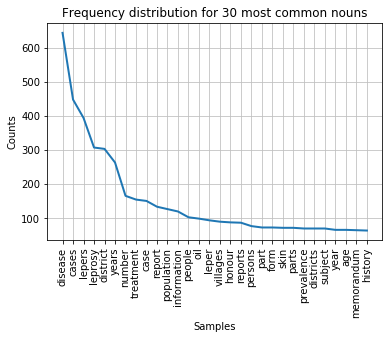

In [48]:
# this first line is used so that the plot is rendered inline with the text in the notebook 
%matplotlib inline

from nltk.probability import FreqDist
fdist = FreqDist(nouns)
fdist.plot(30,title='Frequency distribution for 30 most common nouns')

### 6.3 Visualising most frequent nouns in a word cloud

We can also visualise the nouns as a word cloud. You first need to install the wordcloud package:

In [49]:
!pip install wordcloud

A word cloud allows us to see a different representation of the nouns in the collection using the ```WordCloud( ).generate_from_frequencies()``` method. The input for this method is a frequency dictionary of all tokens and their counts in the text. This needs to be created first by importing the ```Counter``` package in Python and creating a dictionary using the ```nouns``` list as input.
We generate the WordCloud using the frequency dictionary and plot the figure to size. We can show the plot using ```plt.show()```.

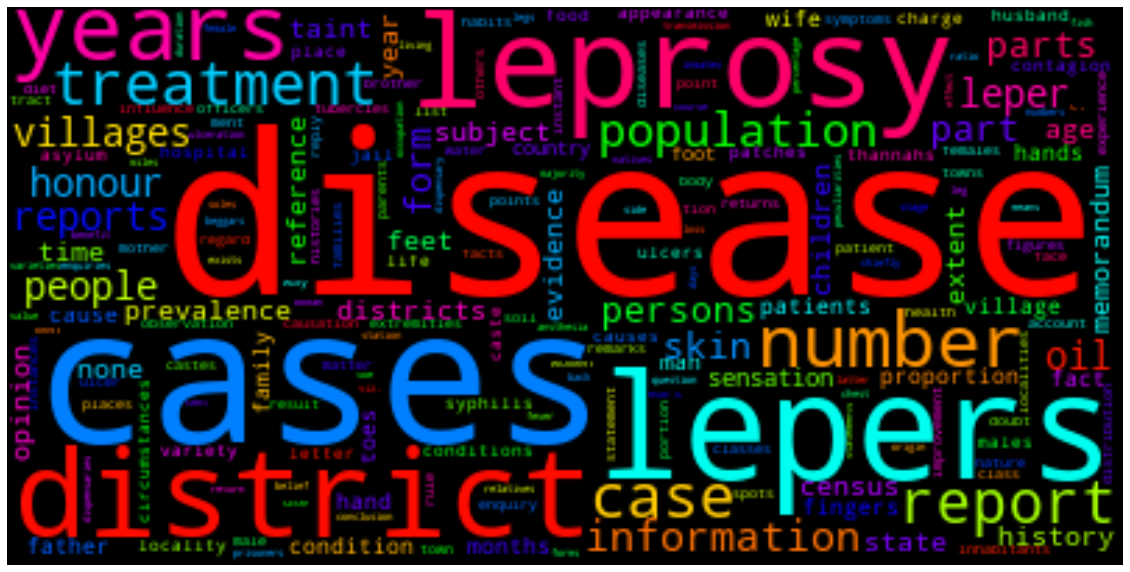

In [50]:
from collections import Counter
dictionary=Counter(nouns)  #this turns the nouns list into a frequency dictionary, where each word and its count is recorded

from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.rcParams["figure.figsize"] = (20,15)   # this line specifies the size of the graph
plt.imshow(cloud, interpolation='bilinear')  # this line specifies how the words are layed out in the word cloud
plt.axis('off')
plt.show()

### 🦋 Task

Now try to create a word cloud for all adjectives in this file.

<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    adjectives = [] 
    adjectives = [word.lower() for (word, pos) in mhbi74457530_tagged if (pos == 'JJ' or pos == 'JJR') or pos == 'JJS'] 
    dictionary=Counter(adjectives)
    from wordcloud import WordCloud
    %matplotlib inline
    import matplotlib.pyplot as plt
    cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
    plt.rcParams["figure.figsize"] = (20,15)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    ### END SOLUTION

</details>

### 6.4 POS-tagging the entire corpus

Now we will POS-tag the entire collection. The next pieces of code are a bit more advanced for programming beginnners. For the purpose of this class, we won't go into detail explaining each line.  However, if you want to try this out yourself then you can copy and paste the code into your notebook and it should run.  We also provide the POS-tagged output files for the entire collection on Github, so if you can't run this part of the code then you will still be able to download the POS-tagged files to use for follow-on analysis.

The first block of code determines all the files in the directory specified, stores the file names in a list and prints how many files there are using the ```len()``` function, which calculates length (here, the number of filenames that have been stored in a variable. We are only interested in text files in the directory.

In [54]:
import os
file_names =[]
dir = "./data/nls-text-indiaPapers/"

for file_name in os.listdir(dir):
    if file_name.endswith(".txt"):
        if file_name != "readme.txt":
            file_names.append(file_name)
print(file_names)
print("Size of this corpus:")
print(len(file_names))

['75034744.txt', '74972252.txt', '74461102.txt', '75225418.txt', '75027472.txt', '75034340.txt', '83156399.txt', '74464867.txt', '76153462.txt', '75025933.txt', '74463660.txt', '82804610.txt', '74464872.txt', '75061618.txt', '74464866.txt', '75231530.txt', '74952418.txt', '91022595.txt', '75198691.txt', '90724055.txt', '90725439.txt', '75027261.txt', '74461103.txt', '75471993.txt', '77008148.txt', '83165626.txt', '75028344.txt', '74972251.txt', '75502957.txt', '75190026.txt', '82803579.txt', '91022597.txt', '74463272.txt', '75061418.txt', '75022290.txt', '75693199.txt', '74464870.txt', '74464864.txt', '75692279.txt', '74908463.txt', '74464871.txt', '75693198.txt', '90587816.txt', '74465979.txt', '74936002.txt', '87224068.txt', '74463273.txt', '91022596.txt', '74463059.txt', '75507184.txt', '74972250.txt', '91174263.txt', '75062528.txt', '75648808.txt', '82805482.txt', '75032496.txt', '76151893.txt', '75239037.txt', '74939447.txt', '75063222.txt', '74908473.txt', '75648799.txt', '744648

This next code block takes all the file names in the collection, reads the files one by one, determines sentence boundaries using the ```sent_tokenize()``` method, tokenises and POS-tags the words in each sentence and then writes this information to a file (one for each original input file).  You will need this format for your further corpus analysis.

Before you POS-tag the corpus, you need to create an output directory where you want to store the POS-tagged files.  I've decided to put it here ```./data/nls-text-indiaPaper-postagged/```.  To create this directory run the next cell.  You can check that this directory appeared on Noteable.

In [55]:
import os

output_dir = "./data/nls-text-indiaPaper-postagged/" #specify the output directory path here

try:
    os.mkdir(output_dir)
except OSError:
    print ("Creation of the directory %s failed" % output_dir)
else:
    print ("Successfully created the directory %s " % output_dir)

Creation of the directory ./data/nls-text-indiaPaper-postagged/ failed


Running the next bit of code will take a while as the POS-tagging needs to be carried out for each of the 469 files.  Time for a break or a cup of tea.

Each file name that is processed will be printed below (so you know that it was processed) and you should see the output files appearing one by one in the output directory. Some files are bigger than others and take longer to tag.

In [56]:
for file_name in file_names:
    file_id=file_name.strip()

    file_path=dir + file_name
    file = open(file_path,'r', encoding='latin1')
    raw_text = file.read()
    file.close()
    
    print("POS tagging file: " + file_path)
    sentences = nltk.sent_tokenize(raw_text)
    tokenised = [nltk.word_tokenize(sent) for sent in sentences]
    pos_tagged = [nltk.pos_tag(sent) for sent in tokenised]
    
    file_content=""
    for sent in pos_tagged:
        file_content = file_content + " ".join(word + "_" + tag for word, tag in sent) + "\n"
    
    file_id = file_name.replace(".txt", "")
    pos_file_name = file_id + "-pos.txt"
    f = open(output_dir+pos_file_name, "w")
    f.write(file_content)
    f.close()

POS tagging file: ./data/nls-text-indiaPapers/75034744.txt
POS tagging file: ./data/nls-text-indiaPapers/74972252.txt
POS tagging file: ./data/nls-text-indiaPapers/74461102.txt
POS tagging file: ./data/nls-text-indiaPapers/75225418.txt
POS tagging file: ./data/nls-text-indiaPapers/75027472.txt
POS tagging file: ./data/nls-text-indiaPapers/75034340.txt
POS tagging file: ./data/nls-text-indiaPapers/83156399.txt
POS tagging file: ./data/nls-text-indiaPapers/74464867.txt
POS tagging file: ./data/nls-text-indiaPapers/76153462.txt
POS tagging file: ./data/nls-text-indiaPapers/75025933.txt
POS tagging file: ./data/nls-text-indiaPapers/74463660.txt
POS tagging file: ./data/nls-text-indiaPapers/82804610.txt
POS tagging file: ./data/nls-text-indiaPapers/74464872.txt
POS tagging file: ./data/nls-text-indiaPapers/75061618.txt
POS tagging file: ./data/nls-text-indiaPapers/74464866.txt
POS tagging file: ./data/nls-text-indiaPapers/75231530.txt
POS tagging file: ./data/nls-text-indiaPapers/74952418.t

POS tagging file: ./data/nls-text-indiaPapers/75542041.txt
POS tagging file: ./data/nls-text-indiaPapers/75194196.txt
POS tagging file: ./data/nls-text-indiaPapers/82812577.txt
POS tagging file: ./data/nls-text-indiaPapers/76151759.txt
POS tagging file: ./data/nls-text-indiaPapers/75511633.txt
POS tagging file: ./data/nls-text-indiaPapers/77505995.txt
POS tagging file: ./data/nls-text-indiaPapers/91546118.txt
POS tagging file: ./data/nls-text-indiaPapers/75509732.txt
POS tagging file: ./data/nls-text-indiaPapers/74990314.txt
POS tagging file: ./data/nls-text-indiaPapers/83054538.txt
POS tagging file: ./data/nls-text-indiaPapers/91546119.txt
POS tagging file: ./data/nls-text-indiaPapers/77505994.txt
POS tagging file: ./data/nls-text-indiaPapers/75063735.txt
POS tagging file: ./data/nls-text-indiaPapers/75194197.txt
POS tagging file: ./data/nls-text-indiaPapers/75765309.txt
POS tagging file: ./data/nls-text-indiaPapers/75518414.txt
POS tagging file: ./data/nls-text-indiaPapers/74999721.t

POS tagging file: ./data/nls-text-indiaPapers/83544102.txt
POS tagging file: ./data/nls-text-indiaPapers/75006567.txt
POS tagging file: ./data/nls-text-indiaPapers/77953549.txt
POS tagging file: ./data/nls-text-indiaPapers/74914346.txt
POS tagging file: ./data/nls-text-indiaPapers/91533951.txt
POS tagging file: ./data/nls-text-indiaPapers/75028936.txt
POS tagging file: ./data/nls-text-indiaPapers/74462705.txt
POS tagging file: ./data/nls-text-indiaPapers/77505999.txt
POS tagging file: ./data/nls-text-indiaPapers/75063062.txt
POS tagging file: ./data/nls-text-indiaPapers/83054535.txt
POS tagging file: ./data/nls-text-indiaPapers/75023491.txt
POS tagging file: ./data/nls-text-indiaPapers/75014200.txt
POS tagging file: ./data/nls-text-indiaPapers/77505998.txt
POS tagging file: ./data/nls-text-indiaPapers/74462704.txt
POS tagging file: ./data/nls-text-indiaPapers/76154189.txt
POS tagging file: ./data/nls-text-indiaPapers/91541450.txt
POS tagging file: ./data/nls-text-indiaPapers/90840165.t

POS tagging file: ./data/nls-text-indiaPapers/85747399.txt
POS tagging file: ./data/nls-text-indiaPapers/74464882.txt
POS tagging file: ./data/nls-text-indiaPapers/74464896.txt
POS tagging file: ./data/nls-text-indiaPapers/85747401.txt
POS tagging file: ./data/nls-text-indiaPapers/77506000.txt
POS tagging file: ./data/nls-text-indiaPapers/75508898.txt
POS tagging file: ./data/nls-text-indiaPapers/75030882.txt
POS tagging file: ./data/nls-text-indiaPapers/75032703.txt
POS tagging file: ./data/nls-text-indiaPapers/75676285.txt
POS tagging file: ./data/nls-text-indiaPapers/91029430.txt
POS tagging file: ./data/nls-text-indiaPapers/75026170.txt
POS tagging file: ./data/nls-text-indiaPapers/75027087.txt
POS tagging file: ./data/nls-text-indiaPapers/74465418.txt
POS tagging file: ./data/nls-text-indiaPapers/77505694.txt
POS tagging file: ./data/nls-text-indiaPapers/75648800.txt
POS tagging file: ./data/nls-text-indiaPapers/75027722.txt
POS tagging file: ./data/nls-text-indiaPapers/75032477.t

Because Noteable only lets you download one file at the time, we need to zip up the pos-tagged files so that you can save the compressed output to your computer.  To do that run this last cell and then you can dowload the zipped file in the Notebable browser window.

In [ ]:
import shutil
outputdir = "./data/nls-text-indiaPaper-postagged/" 
output_filename = "./data/nls-text-indiaPapers-postagged"

shutil.make_archive(output_filename, 'zip', outputdir)

Well done, you've made it to the end of the POS-tagging lesson.  You have learned how to program in Python, how to process text, how to tokenise and POS-tag it.  You are now ready for further corpus-based analysis.